# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

--------------------------
### Attribute Information:
--------------------------

1. **Number of times pregnant**
2. **Plasma glucose concentration a 2 hours in an oral glucose tolerance test**
3. **Diastolic blood pressure (mm Hg)**
4. **Triceps skin fold thickness (mm):** Its thickness gives information about the fat reserves of the body
5. **2-Hour serum insulin (mu U/ml)**
6. **Body mass index (weight in kg/(height in m)^2)**
7. **Diabetes pedigree function**
8. **Age (years)**
9. **Class variable (0 or 1)**

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style(style='darkgrid')

import plotly.express as px

from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
from sklearn import metrics as mtr

from IPython.display import Image as img
import subprocess

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.4f}'.format        

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

# 2. Print 10 samples from the dataset

In [4]:
df.head(10)

Preg  Plas  Pres  skin  test    mass   pedi  age  class
0     6   148    72    35     0 33.6000 0.6270   50      1
1     1    85    66    29     0 26.6000 0.3510   31      0
2     8   183    64     0     0 23.3000 0.6720   32      1
3     1    89    66    23    94 28.1000 0.1670   21      0
4     0   137    40    35   168 43.1000 2.2880   33      1
5     5   116    74     0     0 25.6000 0.2010   30      0
6     3    78    50    32    88 31.0000 0.2480   26      1
7    10   115     0     0     0 35.3000 0.1340   29      0
8     2   197    70    45   543 30.5000 0.1580   53      1
9     8   125    96     0     0  0.0000 0.2320   54      1

# 3. Print the datatypes of each column and the shape of the dataset

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

count     mean      std     min     25%      50%      75%      max
Preg  768.0000   3.8451   3.3696  0.0000  1.0000   3.0000   6.0000  17.0000
Plas  768.0000 120.8945  31.9726  0.0000 99.0000 117.0000 140.2500 199.0000
Pres  768.0000  69.1055  19.3558  0.0000 62.0000  72.0000  80.0000 122.0000
skin  768.0000  20.5365  15.9522  0.0000  0.0000  23.0000  32.0000  99.0000
test  768.0000  79.7995 115.2440  0.0000  0.0000  30.5000 127.2500 846.0000
mass  768.0000  31.9926   7.8842  0.0000 27.3000  32.0000  36.6000  67.1000
pedi  768.0000   0.4719   0.3313  0.0780  0.2437   0.3725   0.6262   2.4200
age   768.0000  33.2409  11.7602 21.0000 24.0000  29.0000  41.0000  81.0000
class 768.0000   0.3490   0.4770  0.0000  0.0000   0.0000   1.0000   1.0000

In [8]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
df[df == 0].count()

Preg     111
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

1. Zeros in 'Preg'(Pregnancies) is valid
2. Zeros in 'Plas'(Plasma glucose concentration) is invalid; need to address
3. Zeros in 'Pres'(Blood Pressure) is invalid; need to address
4. Zeros in 'Skin'(Skin fold thickness) is invalid; need to address
5. Zeros in 'test'(Insulin test) is invalid; need to address
6. Zeros in 'mass'(BMI) is invalid; need to address
7. Zeros in 'class' is valid

In [10]:
fig = px.histogram(df, x='test', color='class', barmode='group', width=1500)
fig.show()

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [11]:
df1 = df.drop(df[df.Plas == 0].index, axis=0)
df1 = df1.drop(df1[df1.mass == 0].index, axis=0)
df1.Pres[df1.Pres == 0] = -1
df1.skin[df1.skin == 0] = -1


In [12]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=-1, strategy='median')
df1 = pd.DataFrame(si.fit_transform(df1),columns= df1.columns)

df1.test[df1.test == 0] = np.nan

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
ii = IterativeImputer(max_iter=5,random_state=0)
df1 = pd.DataFrame(ii.fit_transform(df1),columns=df1.columns)

In [14]:
df1[df1 == 0].count()
# df1.isnull().sum()

Preg     108
Plas       0
Pres       0
skin       0
test       0
mass       0
pedi       0
age        0
class    488
dtype: int64

In [15]:
df1.drop(df1[df1.test <= 0].index, axis=0, inplace=True)

# 5. Print the descriptive statistics of each & every column using describe() function

In [16]:
df1.describe().T

count     mean     std     min      25%      50%      75%      max
Preg  751.0000   3.8495  3.3772  0.0000   1.0000   3.0000   6.0000  17.0000
Plas  751.0000 122.0453 30.4889 56.0000 100.0000 117.0000 141.0000 199.0000
Pres  751.0000  72.3995 12.1493 24.0000  64.0000  72.0000  80.0000 122.0000
skin  751.0000  29.1225  8.8583  7.0000  25.0000  29.0000  32.0000  99.0000
test  751.0000 153.8326 97.6549 14.0000  90.1053 131.4707 190.0000 846.0000
mass  751.0000  32.4646  6.9282 18.2000  27.5000  32.3000  36.6000  67.1000
pedi  751.0000   0.4729  0.3303  0.0780   0.2440   0.3760   0.6280   2.4200
age   751.0000  33.3089 11.7168 21.0000  24.0000  29.0000  41.0000  81.0000
class 751.0000   0.3515  0.4778  0.0000   0.0000   0.0000   1.0000   1.0000

# 6. See the distribution of 'Class' variable and plot it using appropriate graph

In [17]:
df1['class'].value_counts()

0.0000    487
1.0000    264
Name: class, dtype: int64

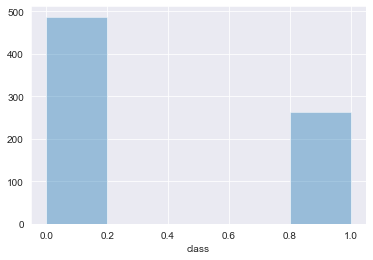

In [18]:
sns.distplot(df1['class'], kde=False);

# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

In [19]:
fig = px.scatter_matrix(df1, color='class', height=1000)
fig.show()

Check for correlation between variables whose values are >0.8

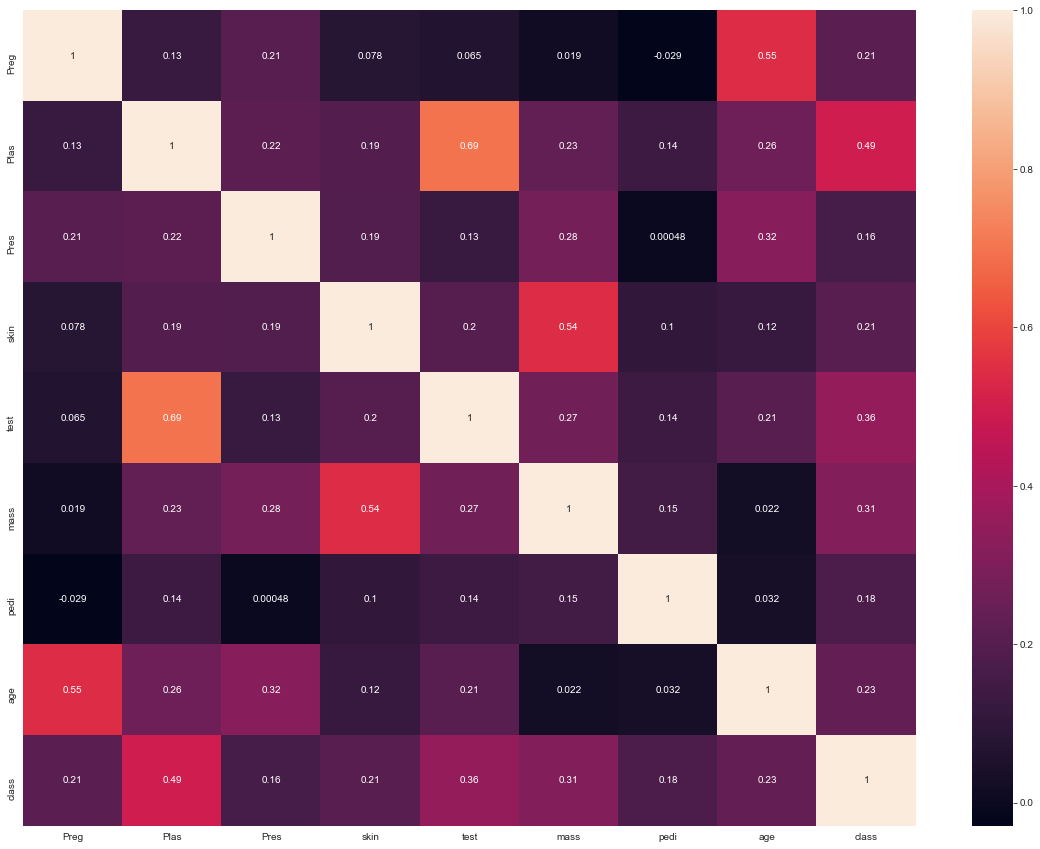

In [20]:
# Plotly doesn't show values (annotation) within the heatmap and hence isn't fit for purpose
# fig = px.imshow(df1.corr())
# fig.show()

plt.figure(figsize=[20,15])
sns.heatmap(df1.corr(), annot=True)
plt.show()

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [21]:
df1y = df1['class'].copy()
df1X = df1.drop('class',axis=1).copy()

df1X_tr, df1X_ts, df1y_tr, df1y_ts = tts(df1X, df1y,test_size=0.3,random_state=6)

In [22]:
df1y_tr.value_counts(normalize=True)*100

0.0000   63.2381
1.0000   36.7619
Name: class, dtype: float64

# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [23]:
dtree = dtc(criterion='entropy',splitter='best')
dtree.fit(df1X_tr,df1y_tr)
print(dtree.score(df1X_tr,df1y_tr))
print(dtree.score(df1X_ts,df1y_ts))

1.0
0.6814159292035398


In [24]:
char_labels = ['N','Y']
dtree_file = open('pima_tree.dot','w')
dot_data = tree.export_graphviz(dtree, out_file=dtree_file, feature_names=list(df1X_tr), class_names=list(char_labels),
                               label='all', filled=True, rounded=True )
dtree_file.close()

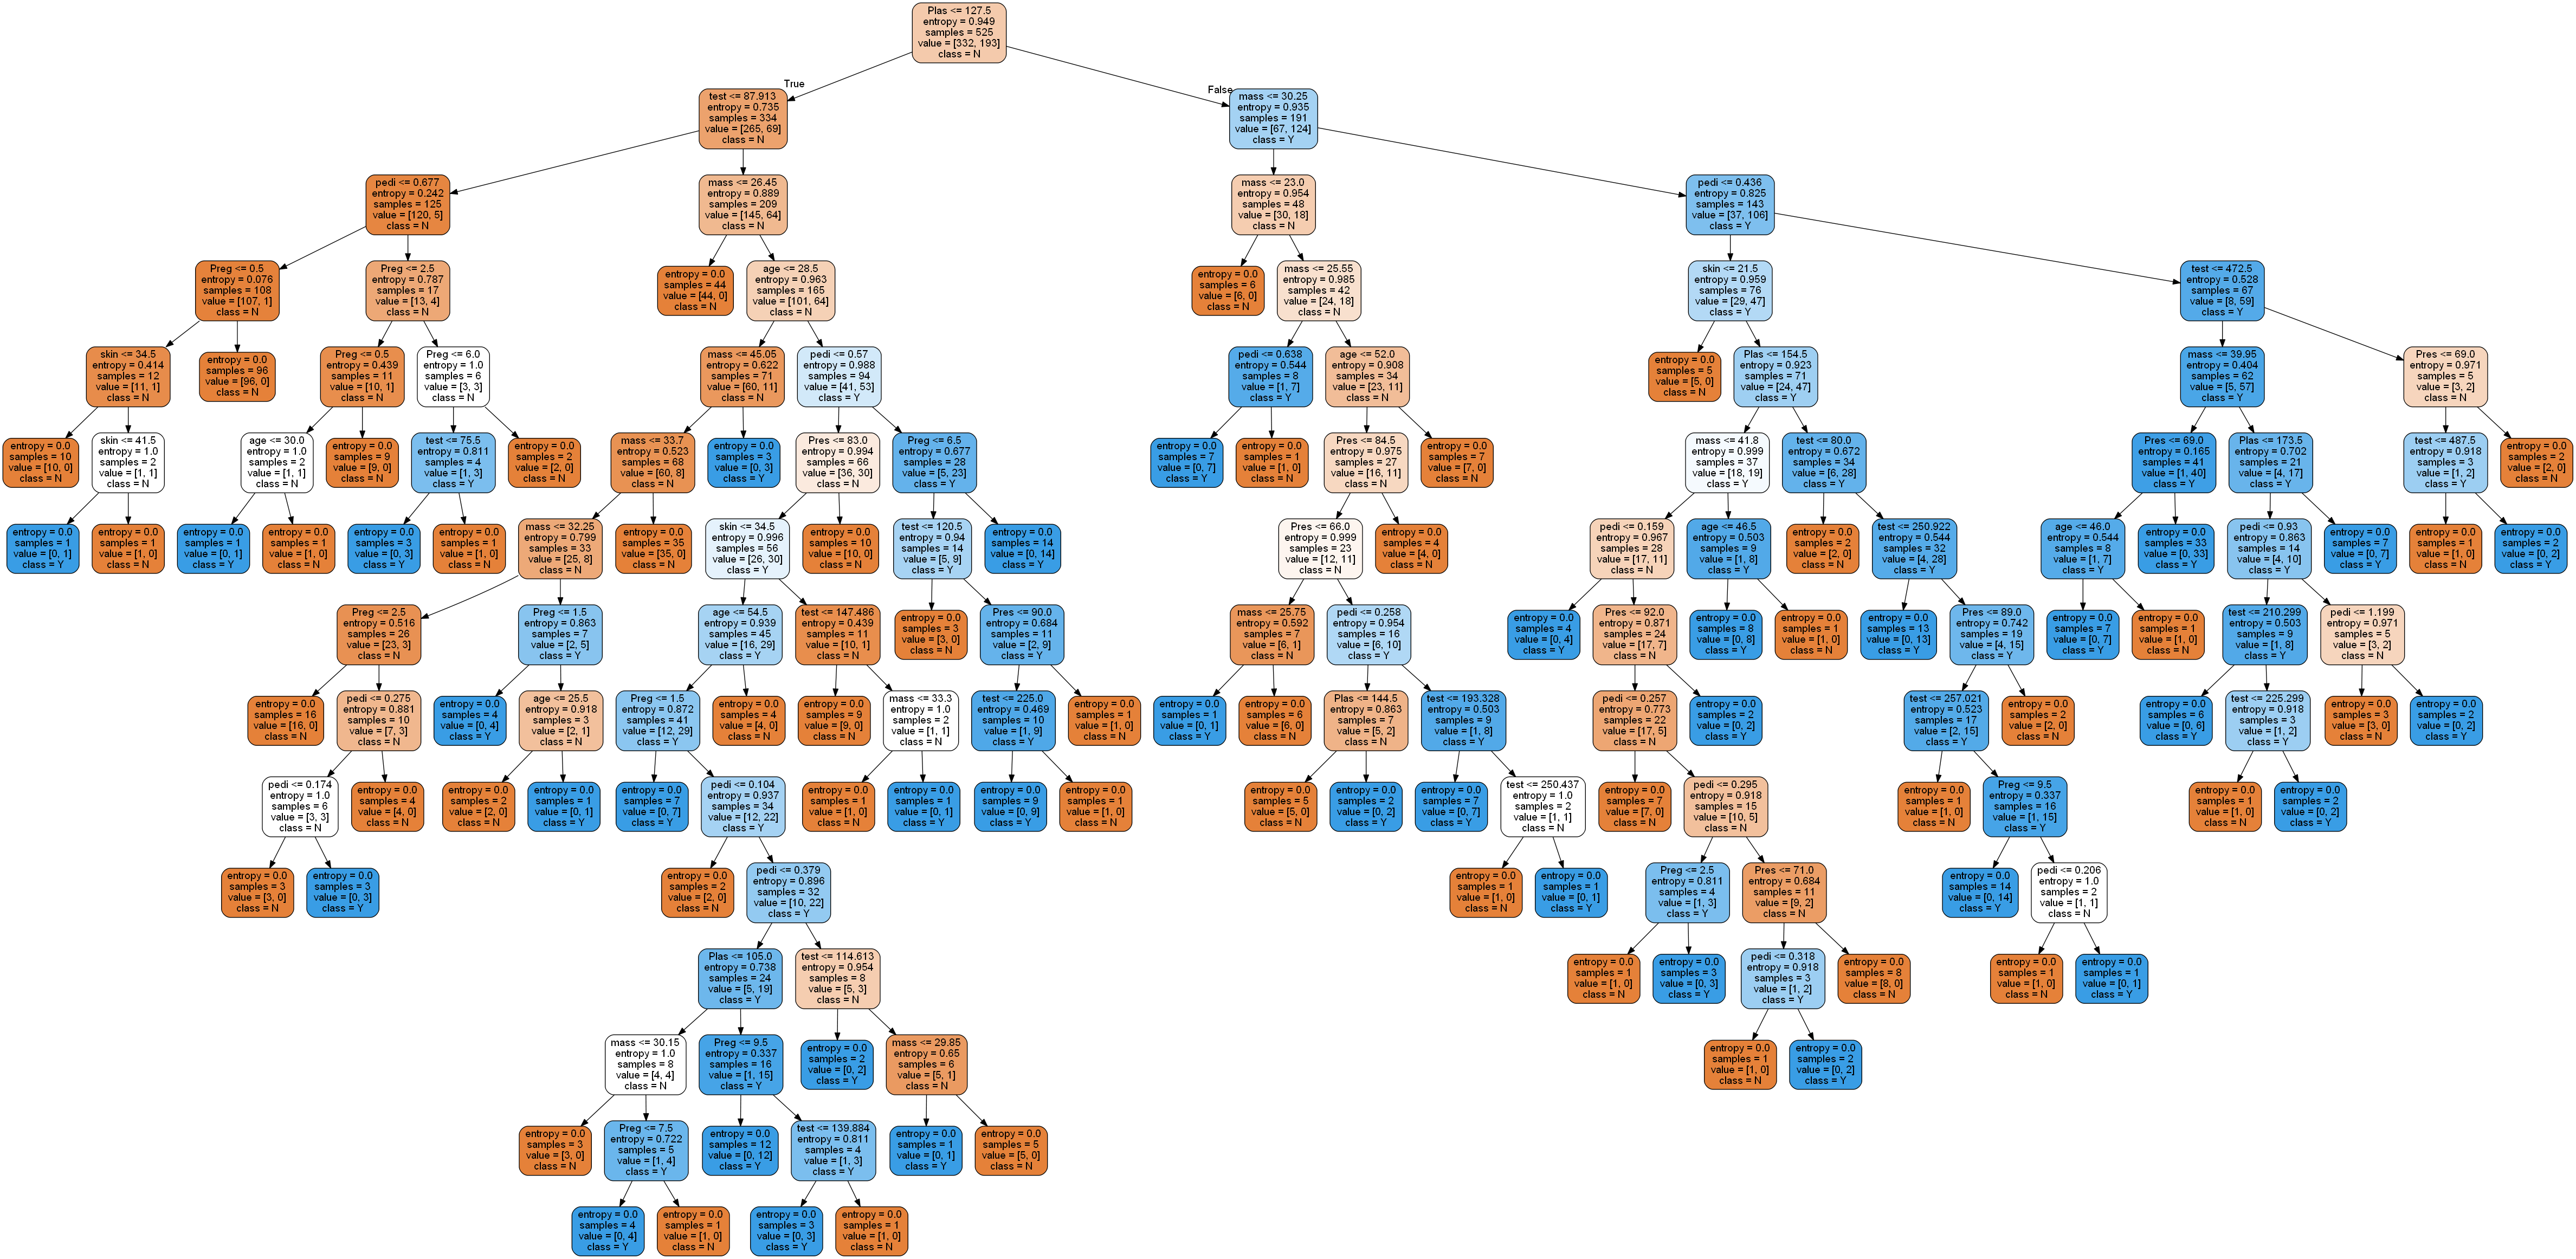

In [25]:
retcode = subprocess.call('dot -Tpng pima_tree.dot -o pima_tree.png',shell=True)
if(retcode > 0):
    print('Error running Graphviz; error code: ', str(retcode))
else:
    display(img('pima_tree.png'))


In [26]:
dtree1 = dtc(criterion='entropy',splitter='best', random_state=6, max_depth=5)
dtree1.fit(df1X_tr,df1y_tr)
print(dtree1.score(df1X_tr,df1y_tr))
print(dtree1.score(df1X_ts,df1y_ts))

0.8342857142857143
0.7477876106194691


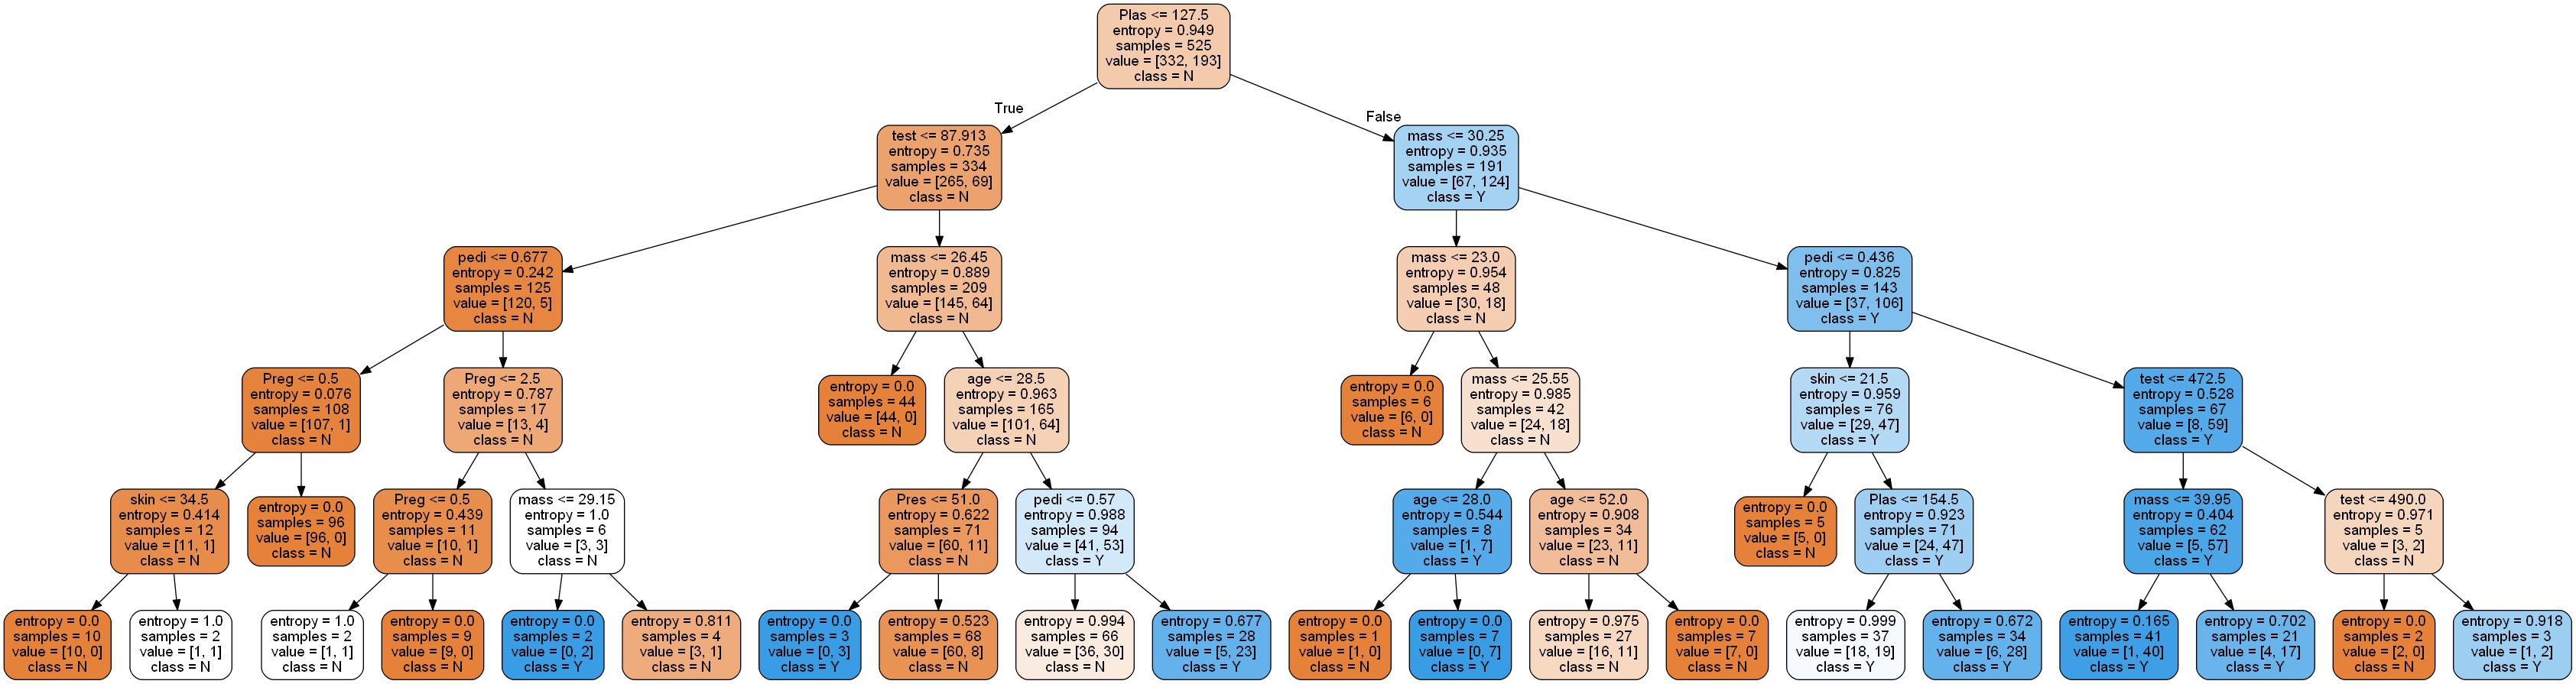

In [27]:
dtree_file1 = open('pima_tree1.dot','w')
dot_data1 = tree.export_graphviz(dtree1, out_file=dtree_file1, feature_names=list(df1X_tr), class_names=list(char_labels),
                               label='all', filled=True, rounded=True )
dtree_file1.close()

retcode = subprocess.call('dot -Tpng pima_tree1.dot -o pima_tree1.png',shell=True)
if(retcode > 0):
    print('Error running Graphviz; error code: ', str(retcode))
else:
    display(img('pima_tree1.png'))

In [28]:
print(pd.DataFrame(dtree1.feature_importances_, columns=['Imp'],index=df1X_tr.columns).sort_values('Imp',ascending=False))

        Imp
Plas 0.3066
mass 0.2245
test 0.1419
age  0.1183
pedi 0.1028
skin 0.0397
Pres 0.0332
Preg 0.0331


# 10. Print the accuracy of the model & print the confusion matrix

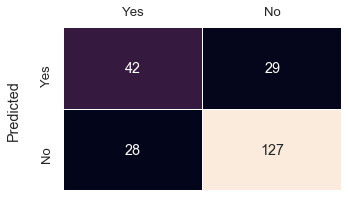

In [29]:
y_pred = dtree1.predict(df1X_ts)
cmat = mtr.confusion_matrix(df1y_ts,y_pred, labels=[1,0])
dfcm = pd.DataFrame(cmat, index=['Yes','No'],columns=['Yes','No'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()
